<h1 align=center> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;应用系统体系架构 - 人工智能模块 </h1>

<h1 align=center> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;A2：卷积神经网络 - 作业</h1>

<br/>


### 关于这个Notebook

在这个Notebook中，大家参照上课的CIFAR-10的案例，构建卷积神经网络来对CIFAR-100数据集中的图像进行分类，并且确保分类准确率可以超过45%。

### 构建对CIFAR-100数据集中的图像进行分类的CNN

有关 CIFAR-100 的详细内容可以参阅：
https://www.cs.toronto.edu/~kriz/cifar.html


### 构建卷积神经网络(Convolutional Neural Nets)
<font color=red>作业要求：</font>

- <font color=red>你可以使用Keras来构建和训练自己的卷积神经网络，并通过调整超参数使你的模型的分类准确率可以达到45%以上。</font>

下面是导入必要的包、加载数据和进行数据预处理的代码：

In [1]:
from __future__ import print_function
import tensorflow.keras as keras
from keras.datasets import cifar100
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# The data, shuffled and split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar100.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [3]:
## Each image is a 32 x 32 x 3 numpy array
x_train[444].shape
x_train[444]

array([[[ 92,  73,  46],
        [ 96,  73,  44],
        [ 96,  69,  40],
        ...,
        [134, 100,  55],
        [136, 101,  57],
        [139, 105,  61]],

       [[ 94,  75,  47],
        [ 95,  71,  42],
        [ 97,  70,  41],
        ...,
        [135, 101,  56],
        [136, 101,  56],
        [145, 110,  65]],

       [[ 97,  78,  52],
        [ 93,  71,  43],
        [101,  74,  46],
        ...,
        [129,  95,  54],
        [136, 102,  57],
        [143, 109,  64]],

       ...,

       [[157, 123,  85],
        [203, 184, 152],
        [209, 185, 134],
        ...,
        [164, 131,  85],
        [158, 122,  72],
        [173, 140,  97]],

       [[160, 129,  89],
        [172, 148, 122],
        [188, 162, 119],
        ...,
        [165, 132,  86],
        [167, 131,  81],
        [182, 149, 106]],

       [[166, 138,  99],
        [157, 130,  97],
        [152, 121,  82],
        ...,
        [159, 128,  82],
        [173, 136,  91],
        [180, 143, 100]]

[75]


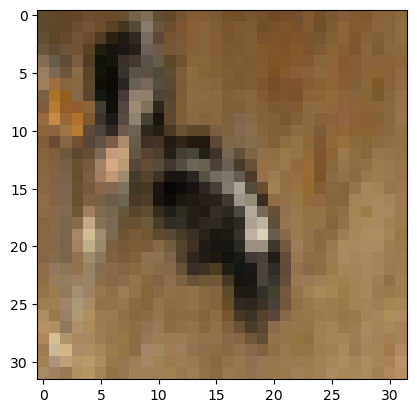

In [4]:
## Let's look at one of the images

print(y_train[444])
plt.imshow(x_train[444]);

In [5]:
num_classes = 100

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [6]:
# now instead of classes described by an integer between 0-9 we have a vector with a 1 in the (Pythonic) 9th position
y_train[444]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

In [7]:
# As before, let's make everything float and scale
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

## Keras 中用于 CNN 的层
- 之前我们使用过基础的 Dense、Activation 和 Dropout 层构建过神经网络。

- 现在我们将描述如何使用Keras中提供的与CNN相关的一些层。

### Conv2D

```python
keras.layers.convolutional.Conv2D(filters, kernel_size, strides=(1, 1), padding='valid', data_format=None, dilation_rate=(1, 1), activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None, **kwargs)
```

其中若干个参数的含义：
- `filters`: 每个位置使用的过滤器数量，换句话说，就是输出的深度。
- `kernel_size`: 一个 (x,y) 元素，给出了要使用的卷积核的高度和宽度。
- `strides`: 一个 (x,y) 元素，给出了在每一维上的步幅。默认值为 `(1,1)`
- `input_shape`: 只有第一层需要这个参数，表示输入的形状。

注意，输出的尺寸是由 kernel_size 和 strides 确定的。

### MaxPooling2D
`keras.layers.pooling.MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None)`

- `pool_size`: 要池化的网格的 (x,y) 尺寸。
- `strides`: 假设等于 `pool_size` ，除非另外做了设定。

### Flatten
将其输入转换为一维向量。通常用于从卷积层转移到全连接层时。

---

## <font color=red> 构建你的CNN </font>
<font color=red> 下面看你的了，构建你自己的模型并进行训练。</font>

In [8]:
model = Sequential()

# 第一层卷积层：使用 32 个 3x3 卷积核，激活函数 ReLU，步幅为1，padding 为 same，卷积后尺寸不变
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=x_train.shape[1:]))

# 第二层卷积层：64 个 3x3 卷积核
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))

# 第1层池化层：2x2 最大池化
model.add(MaxPooling2D(pool_size=(2, 2)))

# 第三层卷积层：128 个 3x3 卷积核
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))

# 第四层卷积层：256 个 3x3 卷积核
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))

# 第2层池化层：2x2 最大池化
model.add(MaxPooling2D(pool_size=(2, 2)))

# 将卷积层的输出展平为一维向量
model.add(Flatten())

# 第一个全连接层：1024 个神经元，使用 ReLU 激活函数
model.add(Dense(1024, activation='relu'))

# Dropout 层：防止过拟合，丢弃率为 0.1
model.add(Dropout(0.1))

# 第二个全连接层：100 个神经元，代表 CIFAR-100 中的 100 个类
model.add(Dense(100, activation='softmax'))

# 编译模型，使用 Adam 优化器和类别交叉熵损失函数
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 输出模型总结
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 256)       295168    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 256)         0         
_________________________________________________________________
flatten (Flatten)            (None, 16384)             0

使用测试数据集验证你的模型的准确度

In [9]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.fit(x_train, y_train,
              batch_size=1024,
              epochs=15,
              validation_data=(x_test, y_test),
              shuffle=True)

Epoch 1/15
49/49 [==============================] - 16s 222ms/step - loss: 4.0646 - accuracy: 0.0910 - val_loss: 3.5195 - val_accuracy: 0.1718
Epoch 2/15
49/49 [==============================] - 7s 149ms/step - loss: 3.2320 - accuracy: 0.2261 - val_loss: 3.0045 - val_accuracy: 0.2733
Epoch 3/15
49/49 [==============================] - 7s 150ms/step - loss: 2.7692 - accuracy: 0.3127 - val_loss: 2.6899 - val_accuracy: 0.3374
Epoch 4/15
49/49 [==============================] - 8s 154ms/step - loss: 2.3967 - accuracy: 0.3916 - val_loss: 2.4858 - val_accuracy: 0.3782
Epoch 5/15
49/49 [==============================] - 7s 150ms/step - loss: 2.0701 - accuracy: 0.4611 - val_loss: 2.4197 - val_accuracy: 0.3956
Epoch 6/15
49/49 [==============================] - 7s 149ms/step - loss: 1.7133 - accuracy: 0.5425 - val_loss: 2.4011 - val_accuracy: 0.4095
Epoch 7/15
49/49 [==============================] - 7s 149ms/step - loss: 1.3696 - accuracy: 0.6255 - val_loss: 2.4815 - val_accuracy: 0.4155
Epoch